In [1]:
%pip install teeplot
from teeplot import teeplot as tp


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define OSF identifiers
consolidating_trie_id = "85nhu"
searchtable_id = "6k5jn"
niave_trie_id = "4egpc"

# Load CSV files into DataFrames directly from OSF URLs
consolidating_trie_df = pd.read_csv(f"https://osf.io/{consolidating_trie_id}/download")
searchtable_df = pd.read_csv(f"https://osf.io/{searchtable_id}/download")
niave_trie_df = pd.read_csv(f"https://osf.io/{niave_trie_id}/download")

# Add 'Type' column to each DataFrame
consolidating_trie_df['Type'] = 'Consolidating Trie'
searchtable_df['Type'] = 'Search Table'
niave_trie_df['Type'] = 'Naive Trie'

# Rename columns for consistency
consolidating_trie_df.rename(columns={'Real Time (s)': 'run_time', 'CPU Time (s)': 'cpu_time', 'Selection Type': 'selection_type'}, inplace=True)
searchtable_df.rename(columns={'Real Time (s)': 'run_time', 'CPU Time (s)': 'cpu_time', 'Selection Type': 'selection_type'}, inplace=True)
niave_trie_df.rename(columns={'Real Time (s)': 'run_time', 'CPU Time (s)': 'cpu_time', 'Selection Type': 'selection_type'}, inplace=True)

# Concatenate all DataFrames
combined_df = pd.concat([consolidating_trie_df, searchtable_df, niave_trie_df])

# Filter out the upper 1% of percentiles for run_time and cpu_time
run_time_threshold = combined_df['run_time'].quantile(0.99)
cpu_time_threshold = combined_df['cpu_time'].quantile(0.99)
filtered_df = combined_df[(combined_df['run_time'] <= run_time_threshold) & (combined_df['cpu_time'] <= cpu_time_threshold)]

# Set Seaborn style
sns.set(style='whitegrid')


teeplots/viz=custom-boxplot-real+x=type+y=run-time+ext=.pdf
teeplots/viz=custom-boxplot-real+x=type+y=run-time+ext=.png


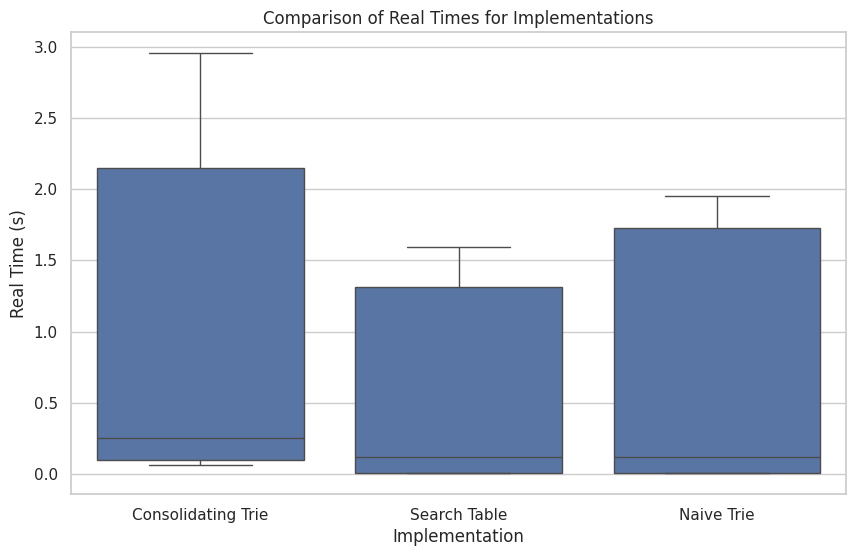

In [3]:
# Create a boxplot to compare real times

def custom_boxplot_real(data,x,y):

  plt.figure(figsize=(10, 6))
  sns.boxplot(x='Type', y='run_time', data=combined_df, showfliers=False)
  plt.title('Comparison of Real Times for Implementations')
  plt.xlabel('Implementation')
  plt.ylabel('Real Time (s)')


# Use tp.tee() to call the custom function and save the plot

tp.tee(custom_boxplot_real, data=combined_df, x='Type', y='run_time')


teeplots/viz=custom-boxplot-cpu+x=type+y=cpu-time+ext=.pdf
teeplots/viz=custom-boxplot-cpu+x=type+y=cpu-time+ext=.png


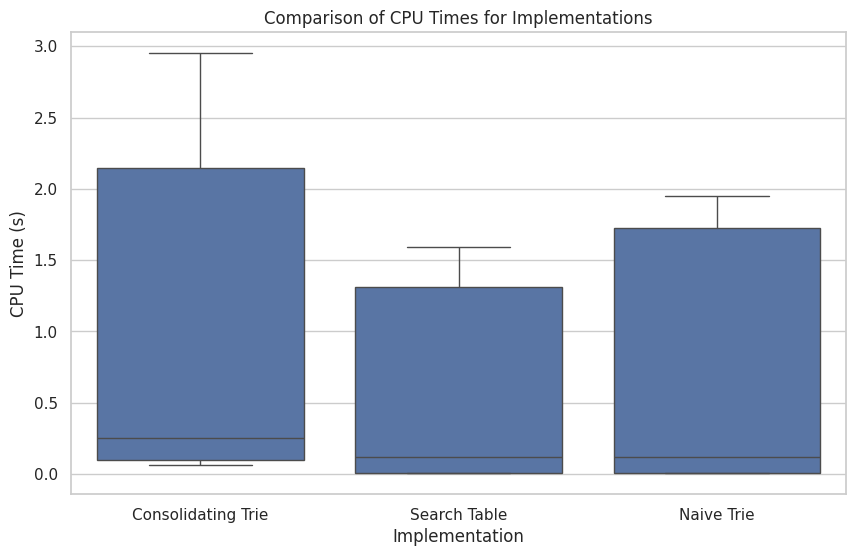

In [4]:
# Create a boxplot to compare CPU times without showing outliers

def custom_boxplot_cpu(data,x,y):

  plt.figure(figsize=(10, 6))
  sns.boxplot(x='Type', y='cpu_time', data=combined_df, showfliers=False)
  plt.title('Comparison of CPU Times for Implementations')
  plt.xlabel('Implementation')
  plt.ylabel('CPU Time (s)')

# Use tp.tee() to call the custom function and save the plot
tp.tee(custom_boxplot_cpu, data=combined_df, x='Type', y='cpu_time')
